# EBAC - SQL para Análise de Dados - Projeto Final

**Objetivo: trata-se de projeto final do curso de SQL para Análise de Dados da EBAC (Escola Britânica de Artes e Criatividade) em que será feita a exploração e análise de dados de crédito com a liguagem SQL.**

**1. Exploração dos dados:**

Os dados copmreendem informações de clientes de uma instituição financeira consolidados num arquivo CSV com as seguintes colunas:
    
    
        * idade = idade do cliente
        * sexo = sexo do cliente (F ou M)
        * dependentes = número de dependentes do cliente
        * escolaridade = nível de escolaridade do clientes
        * salario_anual = faixa salarial do cliente
        * tipo_cartao = tipo de cartao do cliente
        * qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
        * iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
        * meses_inativo_12m = quantidade de meses que o cliente ficou inativo
        * limite_credito = limite de credito do cliente
        * valor_transacoes_12m = valor das transações dos ultimos 12 meses
        * qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

O arquivo original pode ser acessado neste [link](https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset).

**1.1. Tamanho da base de dados:**

Usando a query "SELECT count(*) FROM credito" obtemos como retorno a informação do número de linhas da base de dados que no caso são de 2564.




A seguir um exemplo da base de dados obtido através da query SELECT * FROM credito LIMIT 10:

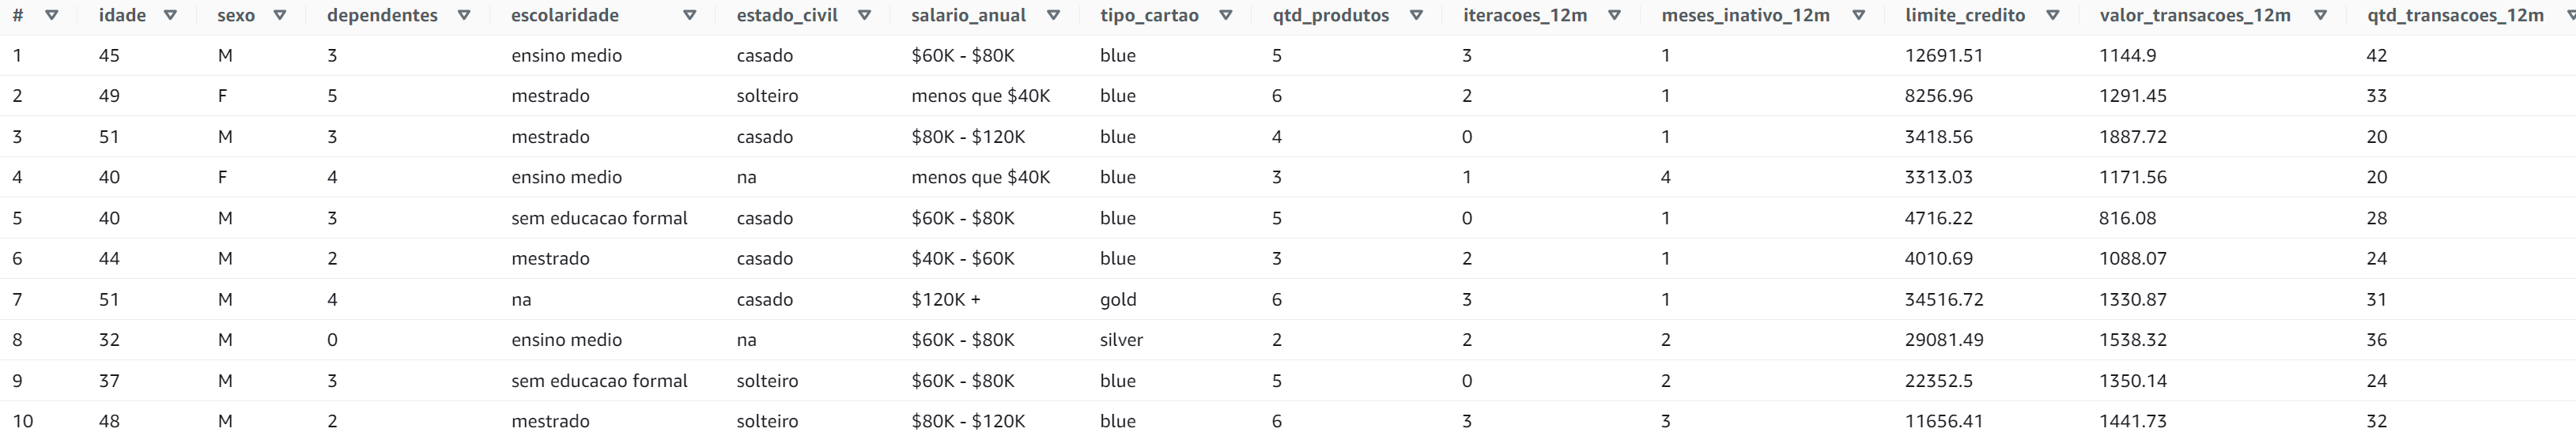

**1.2. Tipos de dados:**

A query "DESCRIBE credito" retorna quais os tipos de dados presentes no dataset:

   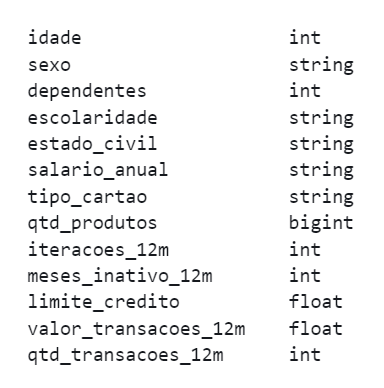




* As variáveis qualitativas são: 

        sexo, escolaridade, estado_civil e tipo_cartao.


* As variáveis quantitativas são: 

        dependentes, salarío_anual, qtd_produtos, iteracoes_12m, meses_inativo_12m, limite_credito, valor_transacoes_12m e qtd_transacoes_12m.

**2. Análise dos dados:**

Utilizando a query "select count(*), salario_anual from credito group by salario_anual" conseguimos identificar o número de clientes por faixa de salário_anual:


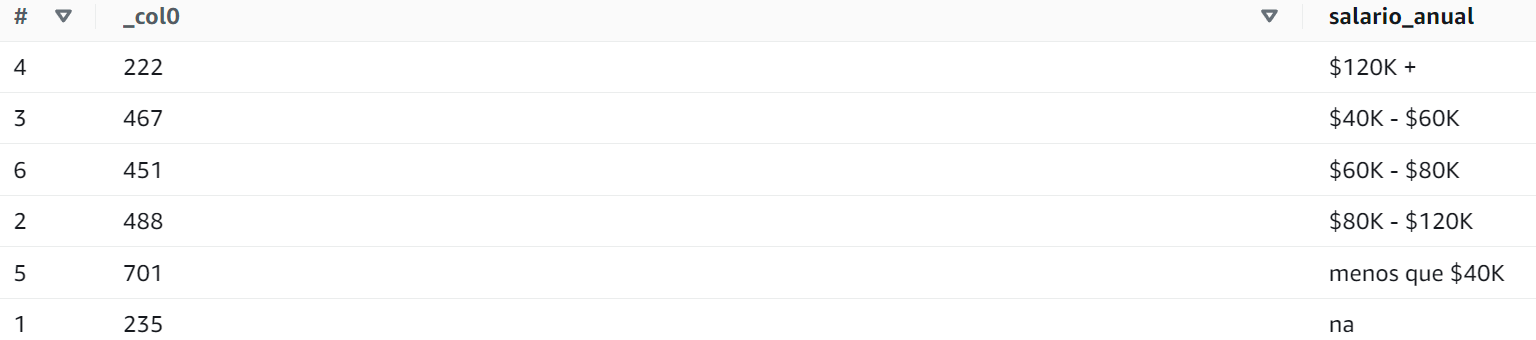



Foram identificados dados nulos (na) que foram tratados (excluídos) na análise dos dados.

A grande maioria dos clientes possui renda menor que $40K.

Através da query 


        select count (*),
        estado_civil
        from credito
        group by estado_civil
        
Conseguimos identificar que o estado_civil da maioria dos clientes é "casado":

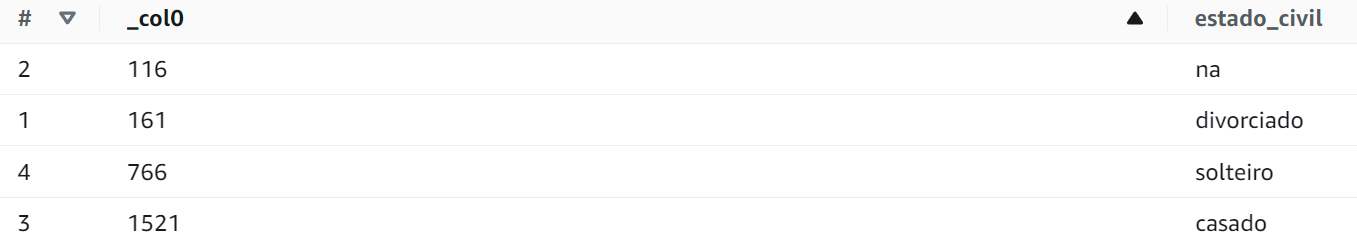

A query

        select count (*),
        escolaridade
        from credito
        group by escolaridade
 
Retorna a informação de que o nível de escolaridade mais frequente é "mestrado":

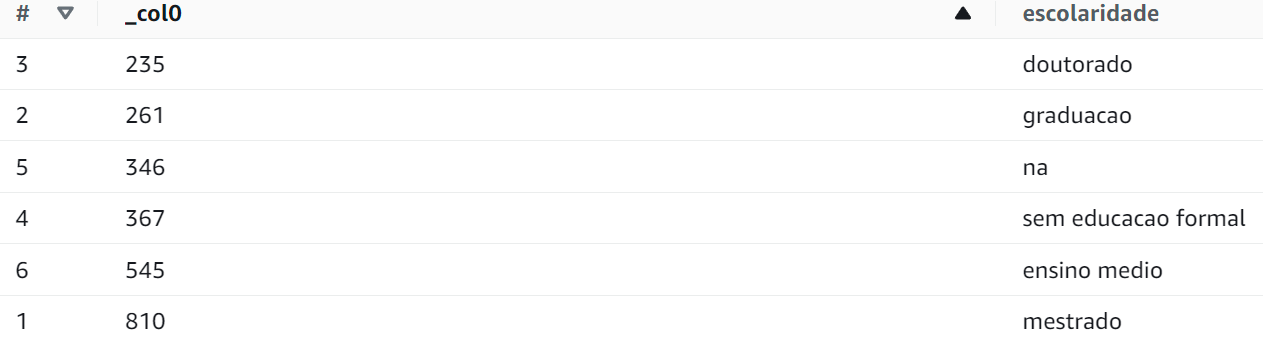

Já ao analisarmos a distribuição por sexo declarado, temos que existem mais clientes do sexo masculino:

        select count (*),
        sexo
        from credito
        group by sexo
        
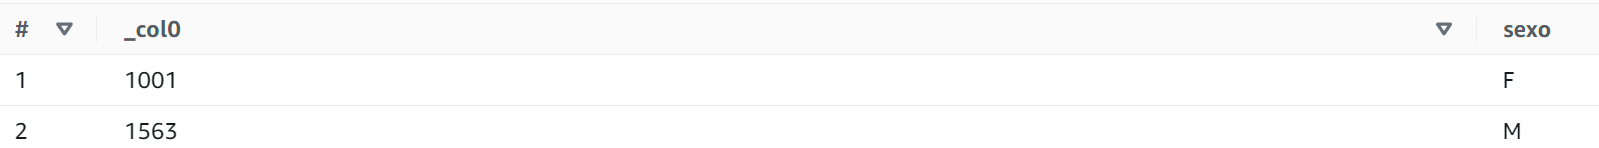

A idade dos clientes é distribuída da seguinte forma e não se mostra relevante para a análise em questão já que é similar para ambos os sexos declarados:

        select avg(idade) as media_idade,
            min(idade) as min_idade,
            max(idade) as max_idade,
            sexo
        from credito
        group by sexo

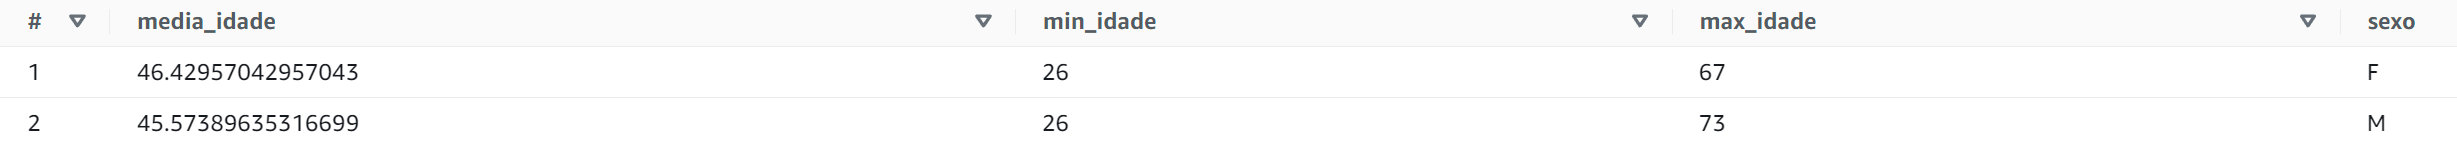

O limite de crédito não parece ter relação direta com o grau de escolaridade, pois, não há variação aparente entre os maiores créditos e os menores créditos concedidos:

        select max(limite_credito) as limite_credito,
            escolaridade,
            tipo_cartao,
            sexo
        from credito
        where escolaridade != 'na'
            and tipo_cartao != 'na'
        group by escolaridade,
            tipo_cartao,
            sexo
        order by limite_credito desc
        limit 10

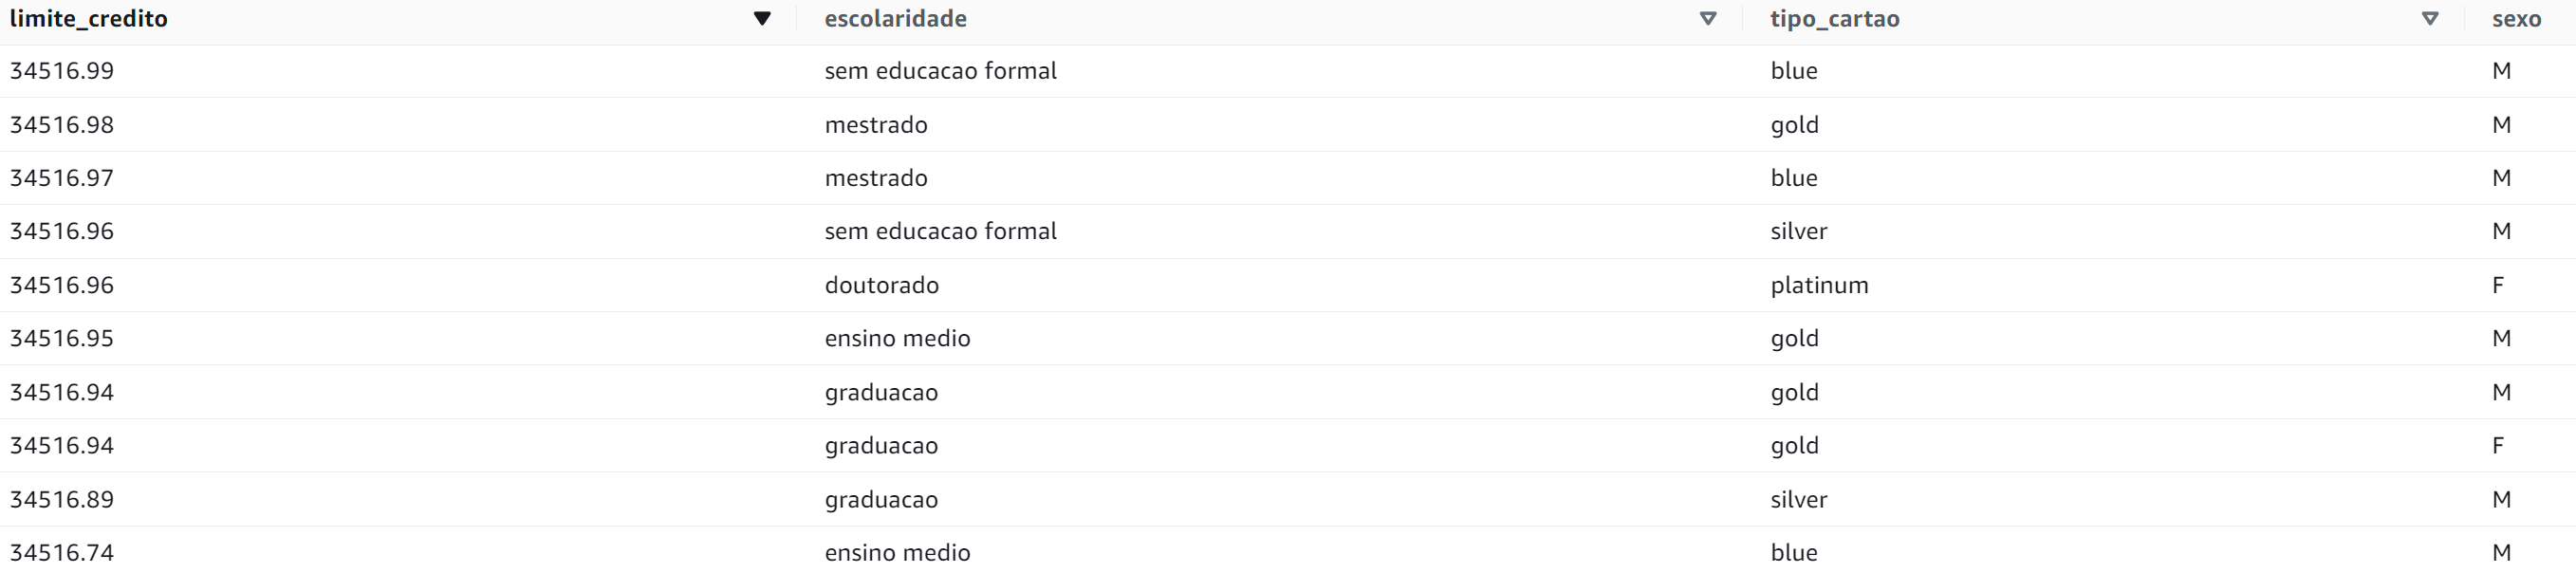

        select max(limite_credito) as limite_credito,
            escolaridade,
            tipo_cartao,
            sexo
        from credito
        where escolaridade != 'na'
            and tipo_cartao != 'na'
        group by escolaridade,
            tipo_cartao,
            sexo
        order by limite_credito asc
        limit 10

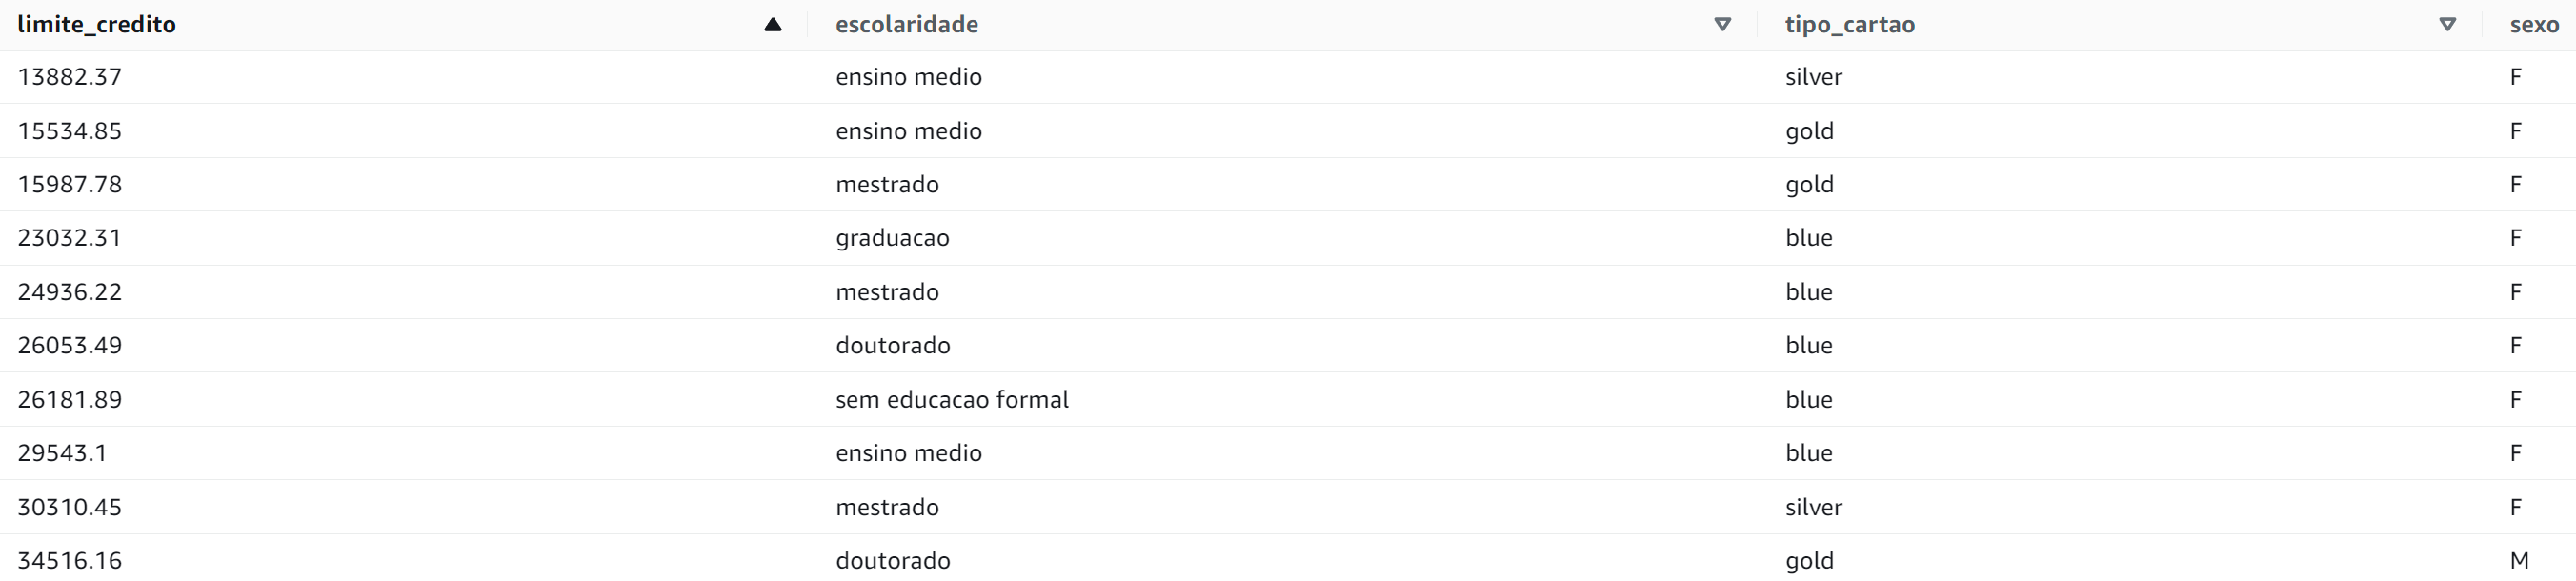

Também há pouca variação entre os valores médios, máximo e mínimo de gasto por sexo:

        select max(valor_transacoes_12m) as maior_valor_gasto,
            avg(valor_transacoes_12m) as media_valor_gasto,
            min(valor_transacoes_12m) as min_valor_gasto,
            sexo
        from credito
        group by sexo


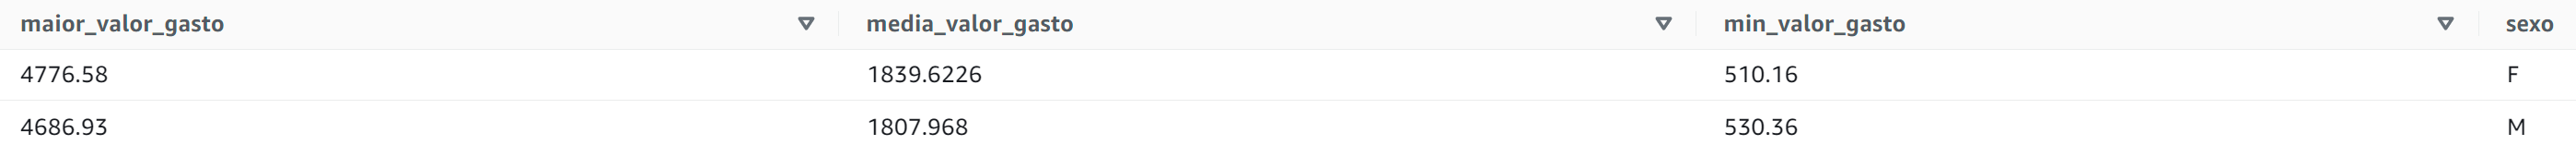

Verificamos que os maiores limites de crédito, em média, foram concedidos aos clientes com salário anual maior que 120K e entre 80 e 120K e os menores limites foram concedidos aos clientes com menor faixa de salário anual:

        select avg(limite_credito) as media_limite,
            sexo,
            salario_anual
        from credito
        where salario_anual != 'na'
        group by sexo,
            salario_anual
        order by avg(limite_credito) desc


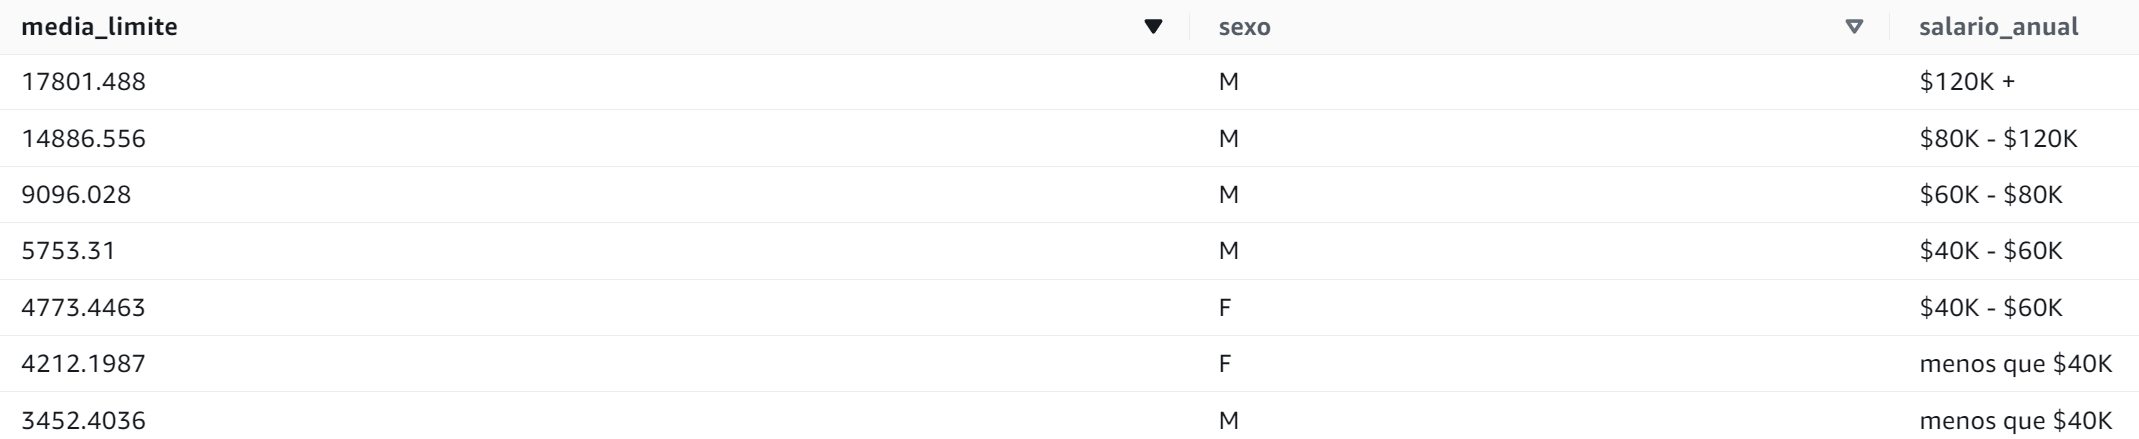


Por fim, uma informação preocupante foi que o limite de crédito concedido para clientes do sexo feminino sempre foi menor, mesmo quando se encontravam na mesma faixa de renda de clientes do sexo masculino:





**3. CONCLUSÃO:**

Do dataset fornecido extraímos os seguintes *insights*:


* A grande maioria dos clientes possui renda menor que $40K;
* O estado civil da maioria dos clientes é "casado;
* O nível de escolaridade mais frequente é "mestrado";
* Existem mais clientes do sexo masculino;
* A idade dos clientes é distribuída de forma similar para ambos os sexos declarados e não se mostra relevante;
* O limite de crédito não parece ter relação direta com o grau de escolaridade;
* Há pouca variação entre os valores médios, máximo e mínimo de gasto por sexo;
* Os maiores limites de crédito, em média, foram concedidos aos clientes com salário anual maior que 120K e entre 80 e 120K e os menores limites foram concedidos aos clientes com menor faixa de salário anual;
*  O limite de crédito concedido para clientes do sexo feminino sempre foi menor, mesmo quando se encontravam na mesma faixa de renda de clientes do sexo masculino.
